## Assignment 3

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.cluster import DBSCAN


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.cluster import KMeans



In [8]:
from sklearn.metrics import silhouette_score

In [9]:
from sklearn.neighbors import NearestNeighbors

In [10]:
data=pd.read_csv(r'C:\Users\Sul3y\Downloads\protein-angle-dataset.csv')

In [11]:
data.drop('position',inplace=True,axis=1) # Column that is not needed for this assignment

# Task 1: Protein Angle Dataset
## The data file “protein-angle-dataset.csv” contains a list of phi and psi combinations that have been observed in a large set of proteins. The angles are measured here in degrees. Answer the following questions using this dataset:

 Show the distribution of phi and psi combinations using:  (a) a scatter plot (b) a 2D histogram Make sure the plots are nice and clean. Can you modify them for better visualization? Hint: consider what would happen if you shift the range of the x- or y-axis on your plots.

In [12]:
#Stores the columns 
phi=data['phi']
psi=data['psi']

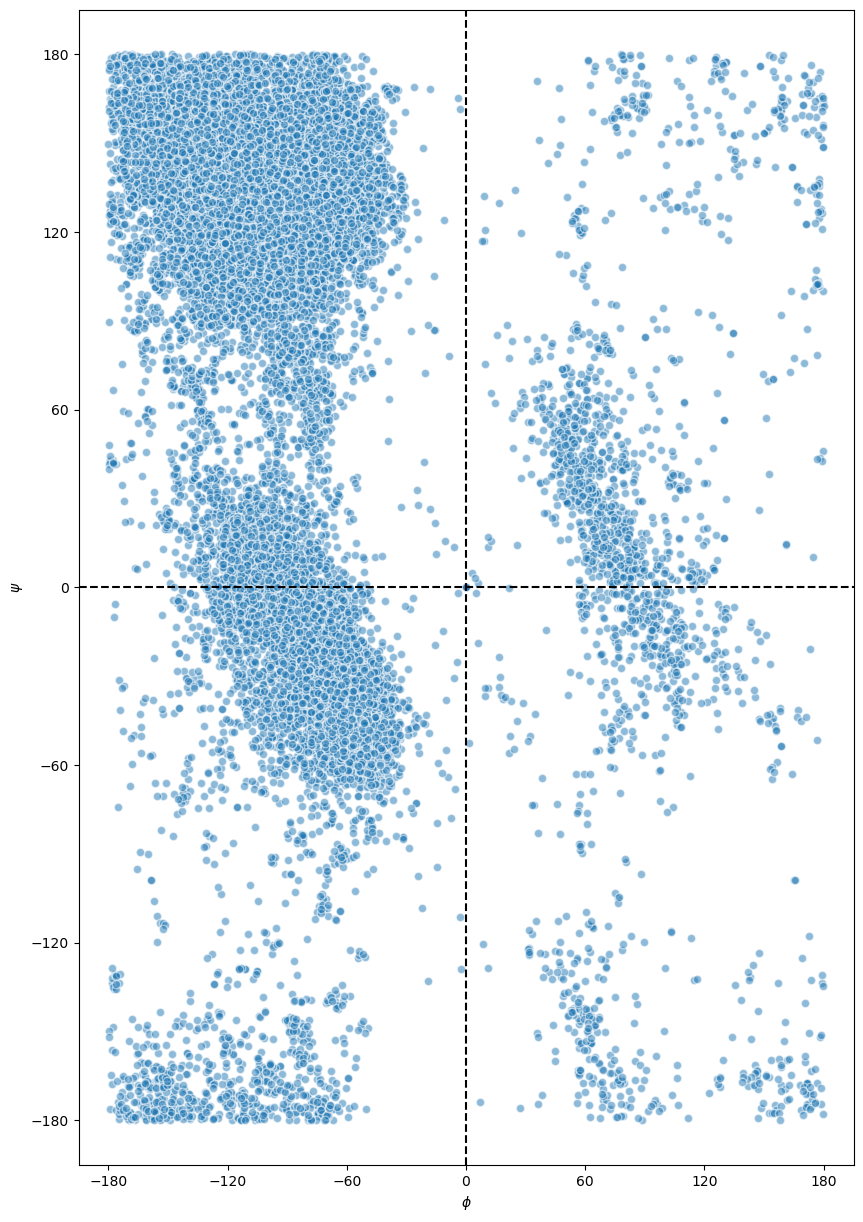

In [13]:
# Calculates the mean of the phi and psi values
mean_phi = np.mean(phi)
mean_psi = np.mean(psi)

# Creates a new figure for plotting with specified size
plt.figure(figsize=(10, 15))

# Adjusts the layout to make sure everything fits well
plt.tight_layout()

# Scatters plot of phi and psi values
plt.scatter(phi, psi,alpha=0.5, edgecolors='w')

# Sets the limits of the x-axis
plt.xlim([-195, 195])

# Sets the limits of the y-axis
plt.ylim([-195, 195])

# Sets the label for the x-axis
plt.xlabel('$\phi$')

# Sets the label for the y-axis
plt.ylabel('$\psi$')

# Draws a horizontal line at y=0 
# 'color' sets the line color to black ('k')
# 'linestyle' sets the style of the line to dashed ('--')
plt.axhline(y=0, color='k', linestyle='--')

# Draws a vertical line at x=0 
plt.axvline(x=0, color='k', linestyle='--')

# Sets the ticks on the x-axis at intervals of 60 degrees from -180 to 180
plt.xticks(np.arange(-180, 181, step=60))

# Sets the ticks on the y-axis at intervals of 60 degrees from -180 to 180
plt.yticks(np.arange(-180, 181, step=60))

# Displays the plot
plt.show()

Ramachadran plot visualizing the dihedral angles of phi and psi in amino acids. 

To modify the visuals of the graph a few things have been done. Alpha has been set to 0.5 which adds transparancy to the points making it easier to observe density. The limits of the x and y axis has been set to 195 this to get a better visual of the points that are in the 360 angular space. The plot has been divided into four quadrants for clearer identification of components. 

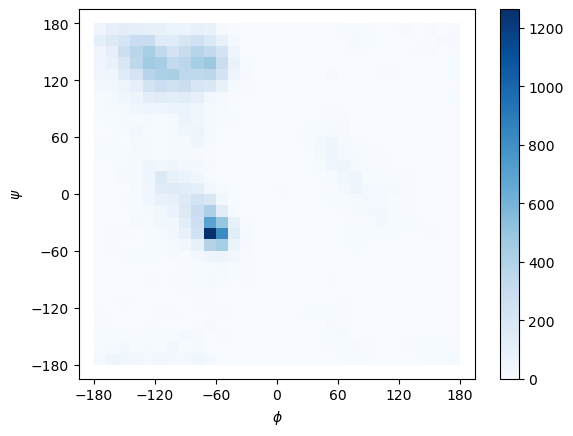

In [14]:
# Creatse a 2D histogram plot for the phi and psi values
# 'bins=30' bins the data into 30x30 grid
# 'cmap' sets the colormap to 'Blues'
plt.hist2d(phi, psi, bins=30, cmap='Blues')

# Adds a colorbar to the plot to indicate the scale of the histogram
plt.colorbar()

# Sets the label for the x-axis
plt.xlabel('$\phi$')

# Sets the label for the y-axis
plt.ylabel('$\psi$')

# Sets the limits of the x-axis
plt.xlim([-195, 195])

# Sets the limits of the y-axis
plt.ylim([-195, 195])

# Sets the ticks on the x-axis at intervals of 60 degrees from -180 to 180
plt.xticks(np.arange(-180, 181, step=60))

# Sets the ticks on the y-axis at intervals of 60 degrees from -180 to 180
plt.yticks(np.arange(-180, 181, step=60))

# Displays the plot
plt.show()


The dense regions can be seen around -60,-60 degrees and -90,120 degrees. The top left consists of beta sheets and the bottom left consists of right handed alpha helices. For visual improvements and to facilitate easier identifications of structures like alpha helices and beta sheets x axis and y axis has been set to 195 with -180 to 180 visible and a tick of 60 degrees.

## Task 2: Use the k-means clustering method to cluster the phi and psi angle combinations in the data file.



(a) Experiment with different values of k. Suggest an appropriate value of k for this task and
motivate this choice.
(b) Do the clusters found in part (a) seem reasonable

a) The elbow method was used to determine the appropriate K. Variance is how far away the points in the cluster are from eachother. A good K value has a low variance score so we can use this to determine K by relating variance to K and finding the point of diminished return called elbow point. If we go for a even higher K then we increase the complexity of the method which will not be worth the small gains we gain from a marginally reduced variance. A higher K value also reduces readability of the plot. 

b) Yes,the top left quadrant aligns with beta sheets and the bottom left with right handed alpha helices. The X markers are situated in the heart of the clusters indicating that the K means algorithm succeded in identifying the center of each cluster.

In [15]:
data_array=data.to_numpy()

In [16]:
print(data_array)

[['LYS' 'A' -149.312855 142.657714]
 ['PRO' 'A' -44.28321 136.002076]
 ['LYS' 'A' -119.972621 -168.705263]
 ...
 ['ILE' 'B' -113.586448 112.09197]
 ['ASN' 'B' -100.668779 -12.102821]
 ['LYS' 'B' -169.95124 94.23368]]


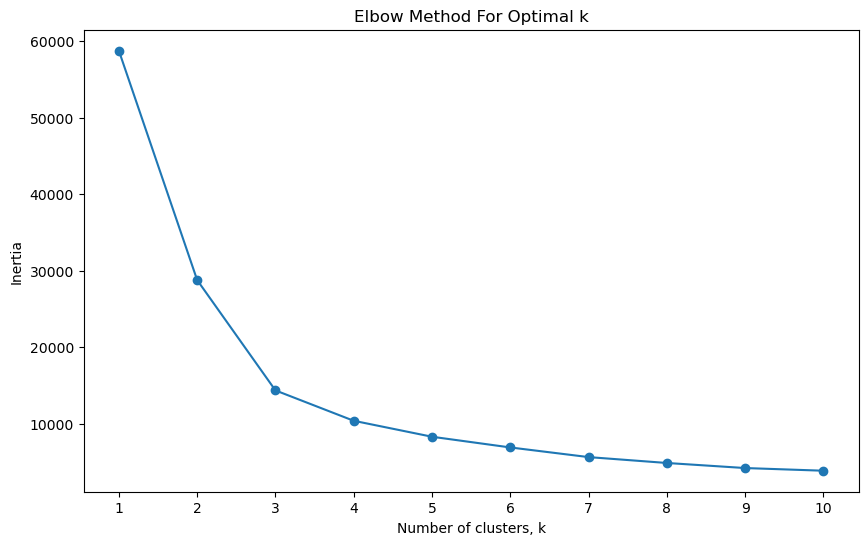

In [17]:
# Assuming 'data' is your dataset

# Now ensure that data_array only contains numeric values
data_array = data.select_dtypes(include=[np.number]).values

# It's a good practice to scale your data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_array)
inertia = []
range_of_clusters = range(1, 11)  # Example: checking for 1 to 10 clusters

for k in range_of_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range_of_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(range_of_clusters)
plt.show()



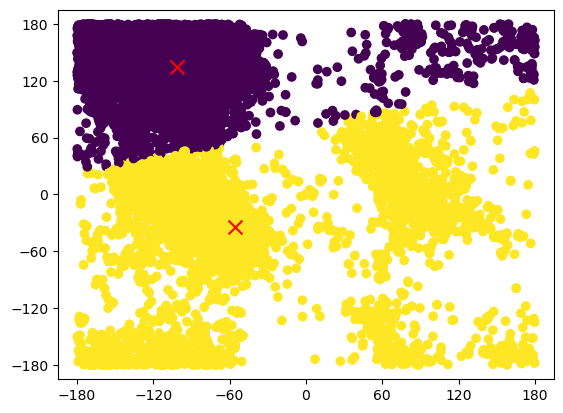

In [18]:
# Selects only the numeric columns (for example 'phi' and 'psi') for clustering
data_numeric = data.select_dtypes(include=[np.number])

# Converts the numeric DataFrame to a NumPy array if not already done
data_array = data_numeric.values

# Number of clusters
k = 2
# Creates a KMeans instance with k clusters
kmeans = KMeans(n_clusters=k)
# Fits the model to the data
kmeans.fit(data_array)
# Centroids
centroids = kmeans.cluster_centers_
# Labels for each point
labels = kmeans.labels_
# Sets the limits of the x-axis
plt.xlim([-195, 195])
# Sets the limits of the y-axis
plt.ylim([-195, 195])
# Sets the ticks on the x-axis at intervals of 60 degrees from -180 to 180
plt.xticks(np.arange(-180, 181, step=60))
# Sets the ticks on the y-axis at intervals of 60 degrees from -180 to 180
plt.yticks(np.arange(-180, 181, step=60))
# Plots the points with color coding based on labels
plt.scatter(data_array[:, 0], data_array[:, 1], c=labels, cmap='viridis')

# Plots the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='x')

# Shows the plot
plt.show()




K means cluster when K=2

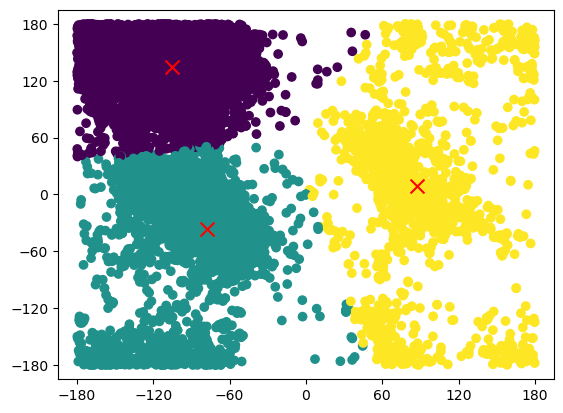

In [19]:
# Number of clusters
k = 3
# Create a KMeans instance with k clusters
kmeans = KMeans(n_clusters=k)
# Fit the model to the data
kmeans.fit(data_array)
# Centroids
centroids = kmeans.cluster_centers_
# Labels for each point
labels = kmeans.labels_
# Sets the limits of the x-axis
plt.xlim([-195, 195])
# Sets the limits of the y-axis
plt.ylim([-195, 195])
# Sets the ticks on the x-axis at intervals of 60 degrees from -180 to 180
plt.xticks(np.arange(-180, 181, step=60))
# Sets the ticks on the y-axis at intervals of 60 degrees from -180 to 180
plt.yticks(np.arange(-180, 181, step=60))
# Plot the points with color coding based on labels
plt.scatter(data_array[:, 0], data_array[:, 1], c=labels, cmap='viridis')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='x')

# Show the plot
plt.show()


K means cluster when K=3

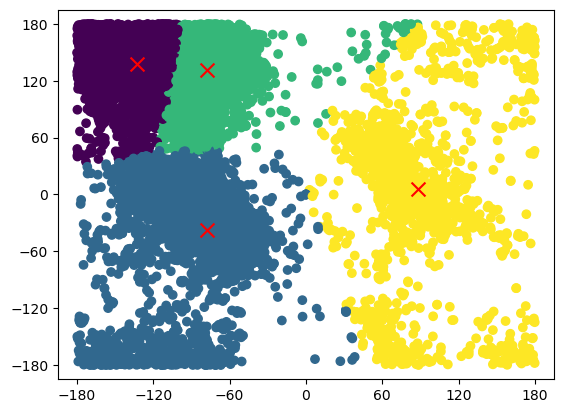

In [20]:
# Number of clusters
k = 4
# Create a KMeans instance with k clusters
kmeans = KMeans(n_clusters=k)
# Fit the model to the data
kmeans.fit(data_array)
# Centroids
centroids = kmeans.cluster_centers_
# Labels for each point
labels = kmeans.labels_
# Sets the limits of the x-axis
plt.xlim([-195, 195])
# Sets the limits of the y-axis
plt.ylim([-195, 195])
# Sets the ticks on the x-axis at intervals of 60 degrees from -180 to 180
plt.xticks(np.arange(-180, 181, step=60))
# Sets the ticks on the y-axis at intervals of 60 degrees from -180 to 180
plt.yticks(np.arange(-180, 181, step=60))
# Plot the points with color coding based on labels
plt.scatter(data_array[:, 0], data_array[:, 1], c=labels, cmap='viridis')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='x')

# Show the plot
plt.show()


K means cluster when K=4

## Task:3 Use the DBSCAN method to cluster the phi and psi angle combinations in the data file.
(a) Motivate the choice of:
i. the minimum number of samples in the neighborhood for a point to be considered as a
core point, and
ii. the maximum distance between two samples belonging to the same neighborhood (“eps”
or “epsilon”).
Compare the clusters found by DBSCAN with those found using k-means.
(b) Highlight the clusters found using DBSCAN and any outliers in a scatter plot.
(c) How many outliers are found

a) To find epsilon the K distance method was used where the elbow is the optimal K value, further explenation of the k distance method can be found below. When the ideal epsilon was found, it was put into a silhoutte score model that compares an object to its cluster in contrast with other clusters. From the silhoutte model the value 5 was chosen since 7 only scores marginally higher. 
c) There were 111 outliers found.

Comparison between K means and DBSCAN:
K mean clearly shows groupings based on proximity to centroids leading to 3 distinct clusters while DBSCAN groups based on density leading to more clusters and also outliers.

The code below is using the DBSCAN algorithm to cluster a dataset (dataset containing values for phi and psi angles) and then analyzes and visualizes the results.
It involves standardizing the data, applying DBSCAN clustering, visualizing the results through scatter plots and histograms, determining the optimal parameters for DBSCAN using a k-distance graph, and analyzing the outliers identified by DBSCAN, specifically looking at the frequency of amino acid residue types among these outliers.

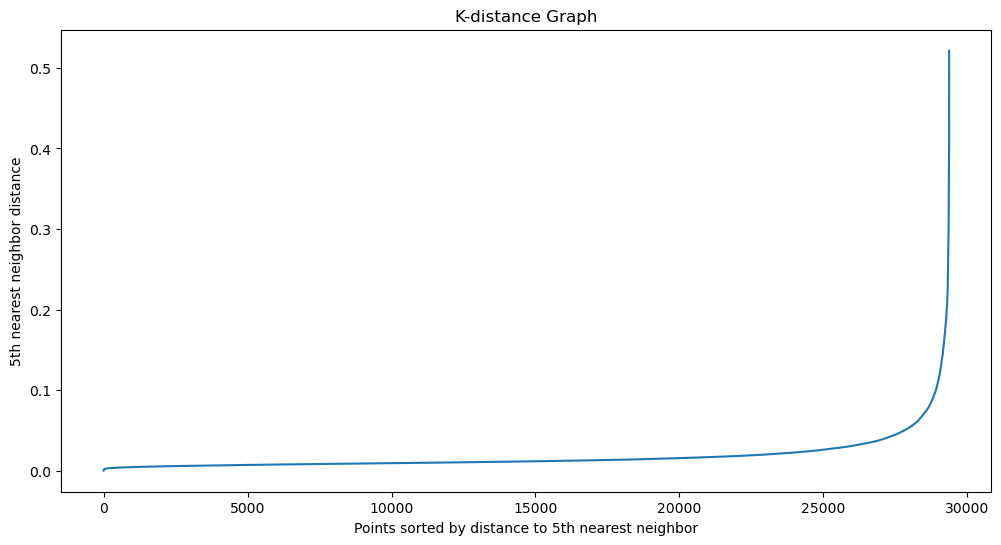

In [22]:



# An instance of NearestNeighbors is created with n_neighbors set to 5.
# This means that for each point in the dataset, the algorithm will find the 5 nearest neighbors.
# Then, nearest_neighbors is fitted to the scaled dataset from before so that... ASDF

nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(data_scaled)


# Finds the distance to the nearest n points for each point and return two arrays
distances, indices = nearest_neighbors.kneighbors(data_scaled)

# Sorts the distances array along the first axis (row-wise).
#Then, each row of distances contains the distances from a point to its nearest neighbors in order

distances = np.sort(distances, axis=0)
distances = distances[:, 4]  # Taking the distance to the 5th nearest neighbor

# Plots the k-distance graph
plt.figure(figsize=(12, 6))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Points sorted by distance to 5th nearest neighbor')
plt.ylabel('5th nearest neighbor distance')
plt.show()


This is a K distance graph and it was used to decide what epsilon to use. It plots the distance to the 5th nearest neighbor. The point where the curv rises is the ideal epsilon since this is the point where afterwards the distance to nearest neighbor increases dramatically.

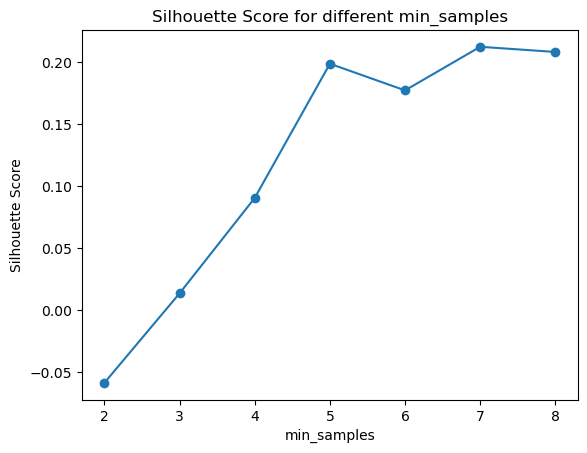

In [23]:
# Standardizes the data for clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_array)  

# Sets the epsilon value for DBSCAN based on previous analysis
eps_value = 0.15  # Epsilon value chosen based on the elbow method or other analysis

# Defines a range of minimum sample values to try with DBSCAN
min_samples_values = range(2, 9)  # Range of min_samples values for experimentation

# Initialize an empty list to store silhouette scores for each min_samples value
silhouette_scores = []

# Loops over the range of min_samples values
for min_samples in min_samples_values:
    # Perform DBSCAN clustering with the current min_samples value
    dbscan = DBSCAN(eps=eps_value, min_samples=min_samples).fit(data_scaled)
    labels = dbscan.labels_  # Cluster labels for each data point

    # Calculates the silhouette score only if valid (not all points in one cluster or noise)
    if len(set(labels)) > 1 and len(set(labels)) < len(data_scaled):
        # Calculate the silhouette score and append it to the list
        score = silhouette_score(data_scaled, labels)
        silhouette_scores.append(score)
    else:
        # Append -1 to indicate invalid or trivial clustering (e.g., no clusters or one big cluster)
        silhouette_scores.append(-1)

# Plots the silhouette scores for each min_samples value
plt.plot(min_samples_values, silhouette_scores, marker='o')  # Line plot with markers
plt.xlabel('min_samples')  # Label for x-axis
plt.ylabel('Silhouette Score')  # Label for y-axis
plt.title('Silhouette Score for different min_samples')  # Title for the plot
plt.show()  # Display the plot


Silhouette score was used to decide upon min_samples. The score measures how similar an object is to its cluster in contrast to other cluster, higher scores signifies more distinct clusters. 

The number of outliers detected by DBSCAN is: 111


Text(0, 0.5, 'psi')

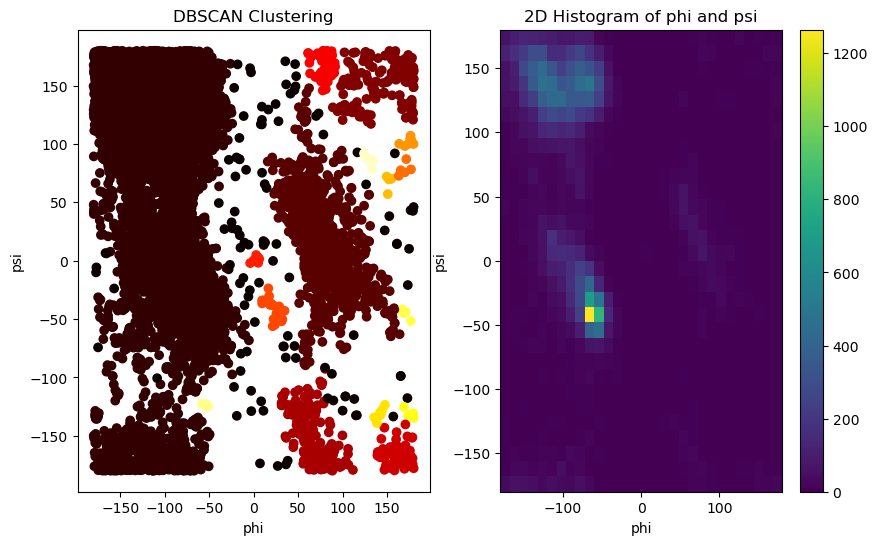

In [24]:
# data_array have been assigned to X. The data in X is then standardized so that each feature has a mean of 0 and a standard deviation of 1.

X =data_array
X_scaled = StandardScaler().fit_transform(X)


# DBSCAN clustering is applied to the standardized data with seperate values on epsilon and minimum sample sizes seperately.

dbscan = DBSCAN(eps=0.15, min_samples=5).fit(X_scaled)


# Extract labels that was assigned by DBSCAN
labels = dbscan.labels_

# printing number of outliers
number_of_outliers = (labels == -1).sum()
print(f"The number of outliers detected by DBSCAN is: {number_of_outliers}")

# Plot results of the DBSCAN clustering and the previous 2D histogram that uses the original data using various functions:
plt.figure(figsize=(10, 6))

# Scatters plot
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='hot', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('phi')
plt.ylabel('psi')

# 2D histogram
plt.subplot(1, 2, 2)
plt.hist2d(X[:, 0], X[:, 1], bins=30, cmap='viridis')
plt.colorbar()
plt.title('2D Histogram of phi and psi')
plt.xlabel('phi')
plt.ylabel('psi')

Cluster when eps=0.15 and min_sample=7. The epsilon and min_sample was decided upon with a k distance graph and silhoutte score.

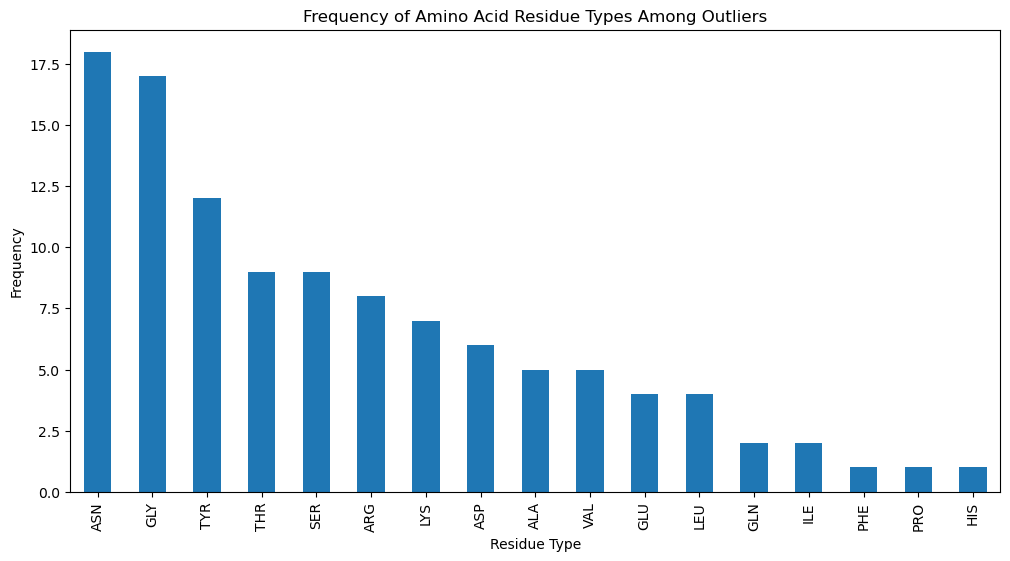

In [25]:
# The code snippet below is designed to analyze and visualize the outliers detected in the dataset
# after applying DBSCAN clustering. It is done in the following steps:
# This line identifies the indices of the outlier points in the dataset.
outlier_indices = np.where(labels == -1)[0]

# This line creates a new DataFrame outliers_data that contains only
# the rows from the original DataFrame data that correspond to the outlier indices.
outliers_data = data.iloc[outlier_indices]

# Counts the frequency of each unique value in the column 'residue name' of the 'outliers_data'
outlier_residue_counts = outliers_data['residue name'].value_counts()

# Checks if the outlier_residue_counts object is not empty, meaning there are outliers to analyze.
if not outlier_residue_counts.empty:
    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    outlier_residue_counts.plot(kind='bar')
    plt.title('Frequency of Amino Acid Residue Types Among Outliers')
    plt.xlabel('Residue Type')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("No outliers were detected.")




## Task4: The data file can be stratified by amino acid residue type. Use DBSCAN to cluster the data that have residue type PRO. Investigate how the clusters found for amino acid residues of type PRO differ from the general clusters (i.e., the clusters that you get from DBSCAN with mixed residue types in question 3). Note: the parameters might have to be adjusted from those used in question 3.

The pro residue has a compact shape due to its structural rigidity. The general cluster has a less compact shape because of the combination of different amino acid residues. The compactness of the pro residue indicates its lack of flexibility in the range of conformations it can assume due to its side chain. The general clusters dispersion shows the diverse range of conformations it can assume due to side chain variety between the different amino acids.

      residue name chain        phi         psi
1              PRO     A -44.283210  136.002076
17             PRO     A -49.944645  -25.888991
68             PRO     A -76.452014   97.745207
110            PRO     A -53.054020  -27.254912
123            PRO     A -66.751364   94.099782
...            ...   ...        ...         ...
29284          PRO     B -54.565923  -42.141418
29339          PRO     B -66.803083  136.260650
29340          PRO     B -59.612140  160.048387
29347          PRO     B -48.679835  135.208297
29356          PRO     B -61.621274  -41.694960

[1596 rows x 4 columns]


C:\Users\Sul3y\AppData\Local\Temp\ipykernel_22580\2725348014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residue.drop('position',inplace=True,axis=1)


Text(0, 0.5, 'psi')

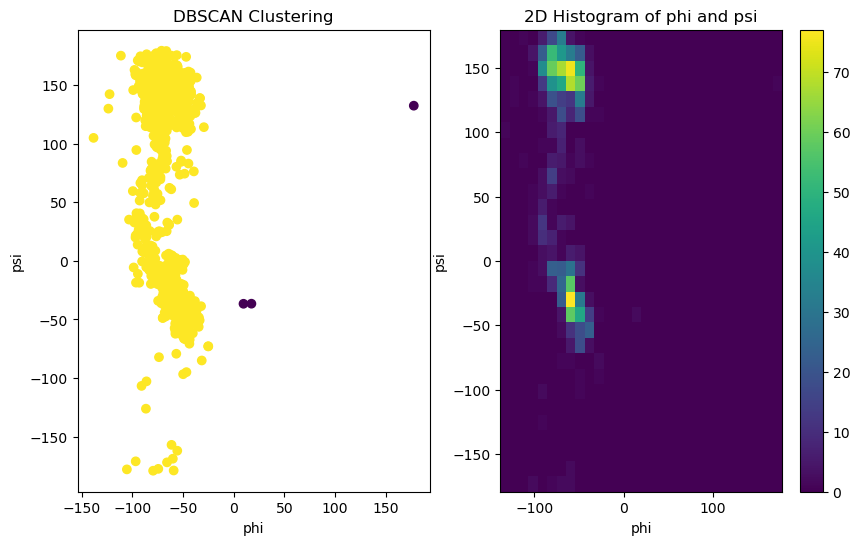

In [26]:
data=pd.read_csv(r'C:\Users\Sul3y\Downloads\protein-angle-dataset.csv')
residue = data [data['residue name'] == 'PRO' ]
residue.drop('position',inplace=True,axis=1)
residue_numeric = residue.select_dtypes(include=[np.number])

# Converts the numeric DataFrame to a NumPy array if not already done
residue_array = residue_numeric.values
print(residue)
X =residue_array
X_scaled = StandardScaler().fit_transform(X)



dbscan = DBSCAN(eps=1, min_samples=3).fit(X_scaled)

# Extracts labels
labels = dbscan.labels_

# Plots results
plt.figure(figsize=(10, 6))

# Scatters plot
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('phi')
plt.ylabel('psi')

# 2D histogram
plt.subplot(1, 2, 2)
plt.hist2d(X[:, 0], X[:, 1], bins=30, cmap='viridis')
plt.colorbar()
plt.title('2D Histogram of phi and psi')
plt.xlabel('phi')
plt.ylabel('psi')

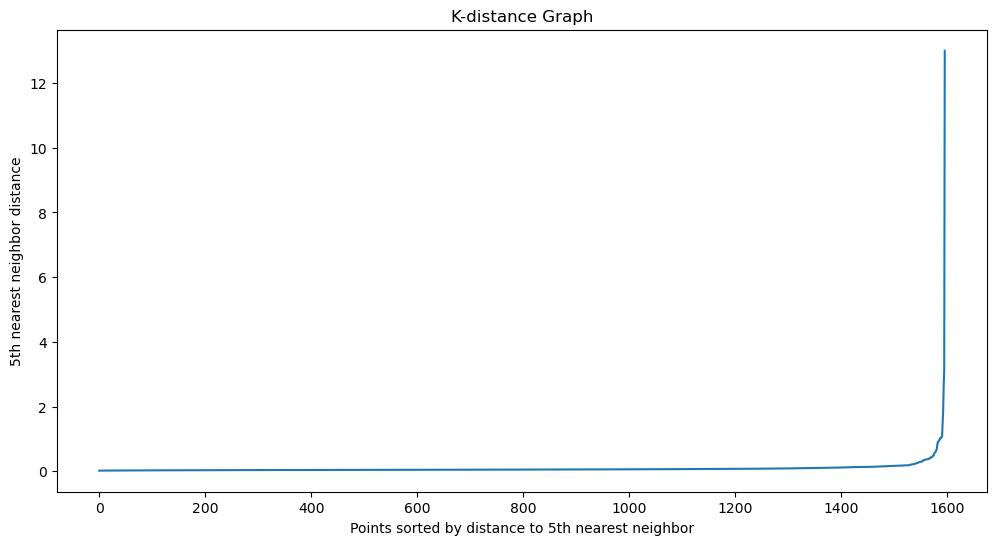

In [27]:


# Uses the NearestNeighbors class to find the nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(X_scaled)

# Finds the distance to the nearest n points for each point
distances, indices = nearest_neighbors.kneighbors(X_scaled)

# Sorts the distances
distances = np.sort(distances, axis=0)
distances = distances[:, 4]  # Taking the distance to the 5th nearest neighbor

# Plots the k-distance graph
plt.figure(figsize=(12, 6))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Points sorted by distance to 5th nearest neighbor')
plt.ylabel('5th nearest neighbor distance')
plt.show()

Another K distance graph for the pro residue because of the difference in density.

C:\Users\Sul3y\AppData\Local\Temp\ipykernel_22580\1391589619.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residue.drop(['position'], inplace=True, axis=1)


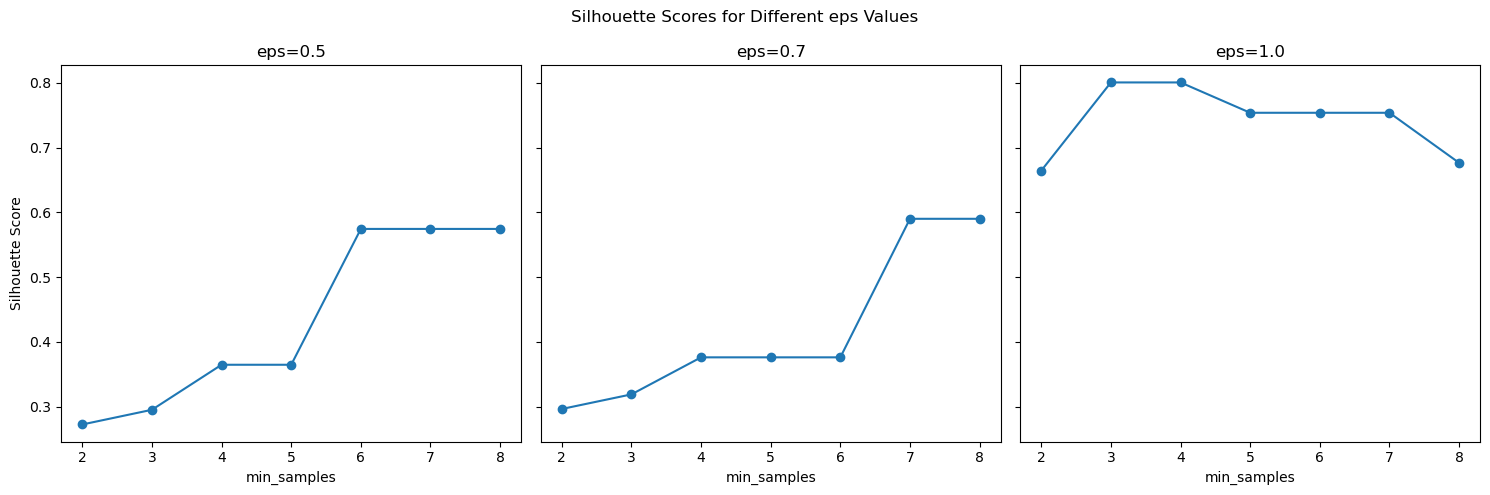

In [28]:


# Loads and preprocess the data
data = pd.read_csv(r'C:\Users\Sul3y\Downloads\protein-angle-dataset.csv')
residue = data[data['residue name'] == 'PRO']
residue.drop(['position'], inplace=True, axis=1)
residue_numeric = residue.select_dtypes(include=[np.number])
residue_array = residue_numeric.values

# Scales the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(residue_array)

# Defines ranges for eps and min_samples
eps_values = [0.5, 0.7, 1.0]  # Example eps values
min_samples_range = range(2, 9)  # Range of min_samples values

# Creates subplots for each eps value
fig, axes = plt.subplots(1, len(eps_values), figsize=(15, 5), sharey=True)

for i, eps in enumerate(eps_values):
    silhouette_scores = []
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels = dbscan.labels_

        # Computes silhouette score only if valid
        if len(set(labels)) > 1 and len(set(labels)) < len(X_scaled):
            score = silhouette_score(X_scaled, labels)
            silhouette_scores.append(score)
        else:
            silhouette_scores.append(-1)  # Invalid or trivial clustering

    # Plots silhouette scores for this eps value
    ax = axes[i]
    ax.plot(min_samples_range, silhouette_scores, marker='o')
    ax.set_title(f'eps={eps}')
    ax.set_xlabel('min_samples')
    if i == 0:
        ax.set_ylabel('Silhouette Score')

plt.suptitle('Silhouette Scores for Different eps Values')
plt.tight_layout()
plt.show()


C:\Users\Sul3y\AppData\Local\Temp\ipykernel_22580\2004172939.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residue.drop(['position'], inplace=True, axis=1)


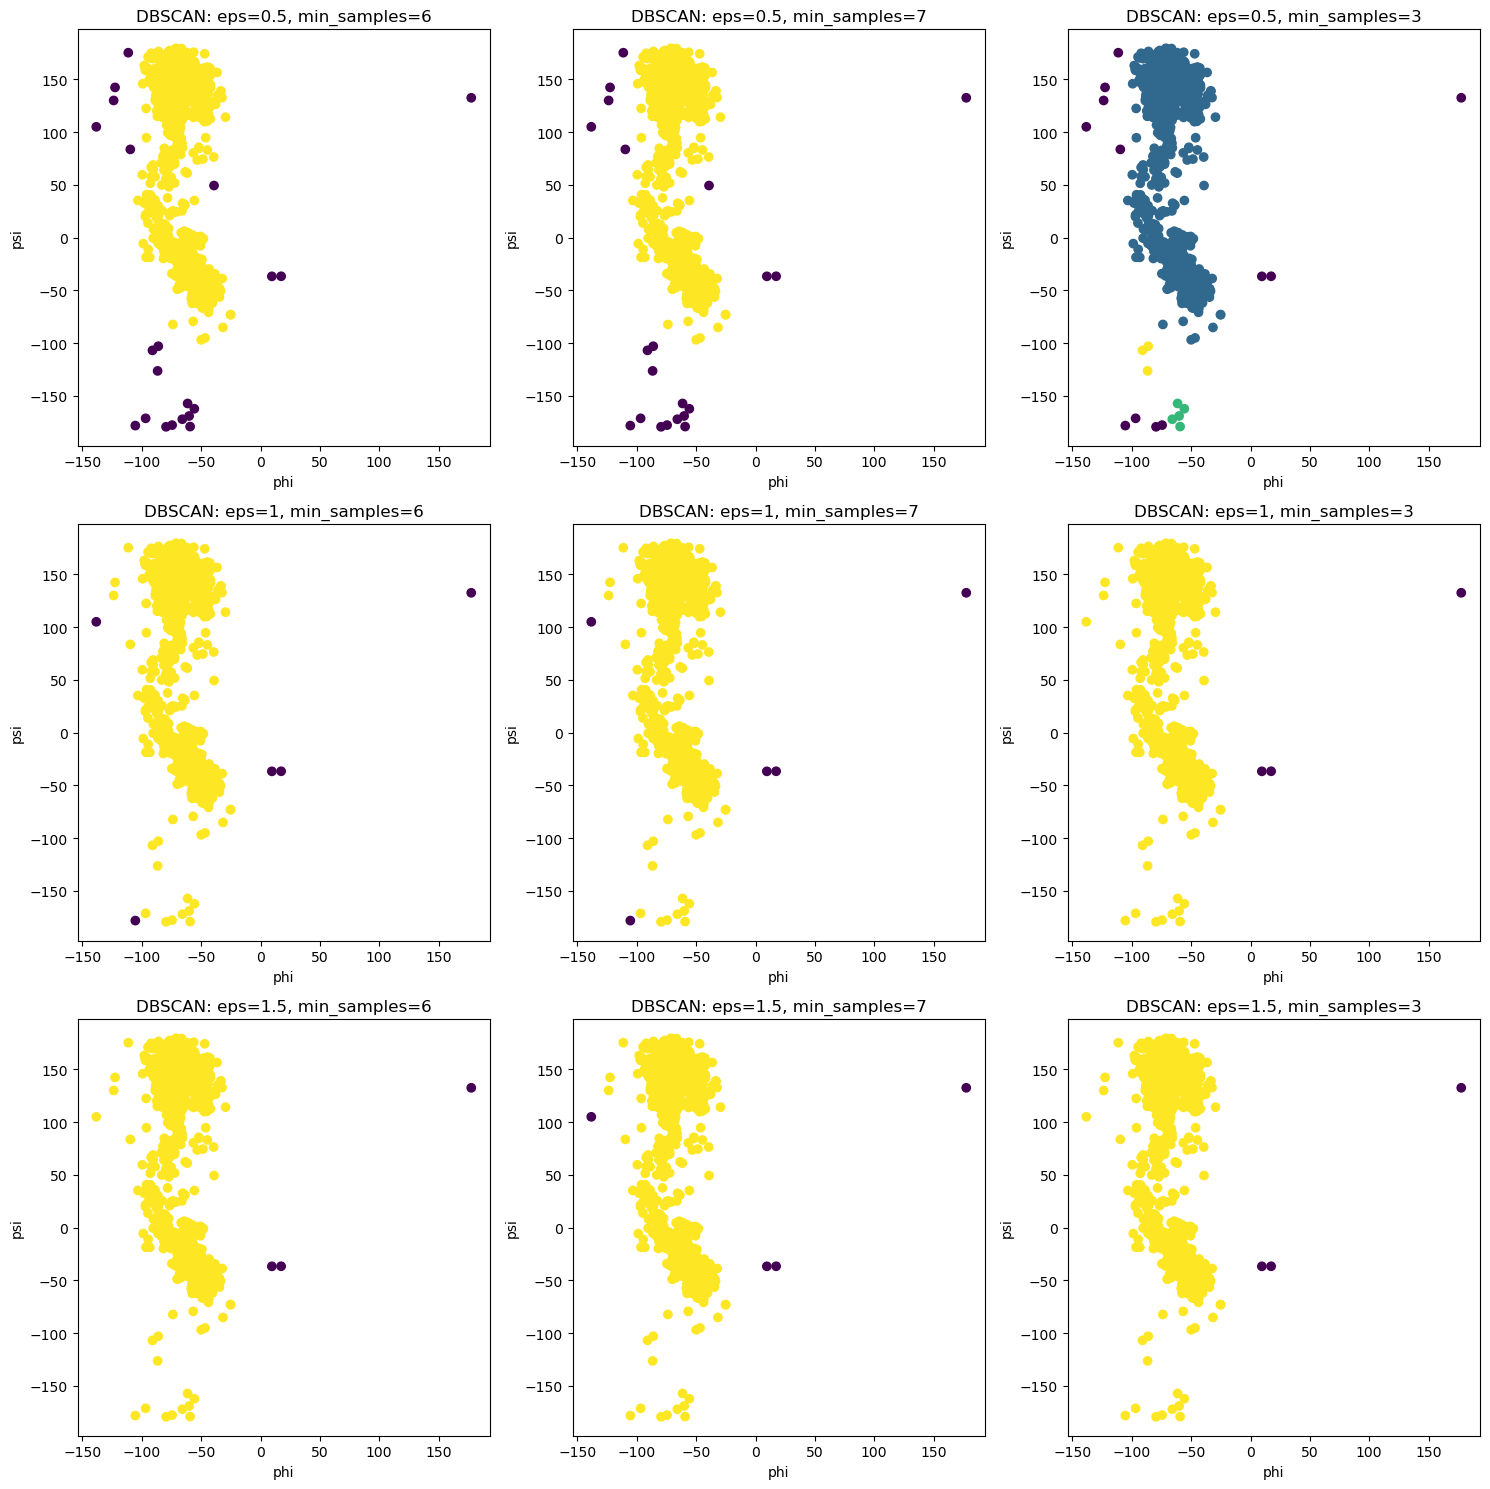

In [29]:


# Loads the data
data = pd.read_csv(r'C:\Users\Sul3y\Downloads\protein-angle-dataset.csv')
residue = data[data['residue name'] == 'PRO']
residue.drop(['position'], inplace=True, axis=1)
residue_numeric = residue.select_dtypes(include=[np.number])

# Converts to NumPy array
X = residue_numeric.values
X_scaled = StandardScaler().fit_transform(X)

# Defines different values for eps and min_samples
eps_values = [0.5, 1, 1.5]  #  Testing 
min_samples_values = [6, 7, 3]  # Testing

# Creates subplots
fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 15))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Performs DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels = dbscan.labels_

        # Selects the subplot
        ax = axes[i, j]

        # Scatters plot
        ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
        ax.set_title(f'DBSCAN: eps={eps}, min_samples={min_samples}')
        ax.set_xlabel('phi')
        ax.set_ylabel('psi')

plt.tight_layout()
plt.show()

C:\Users\Sul3y\AppData\Local\Temp\ipykernel_22580\3426063686.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residue.drop('position',inplace=True,axis=1)


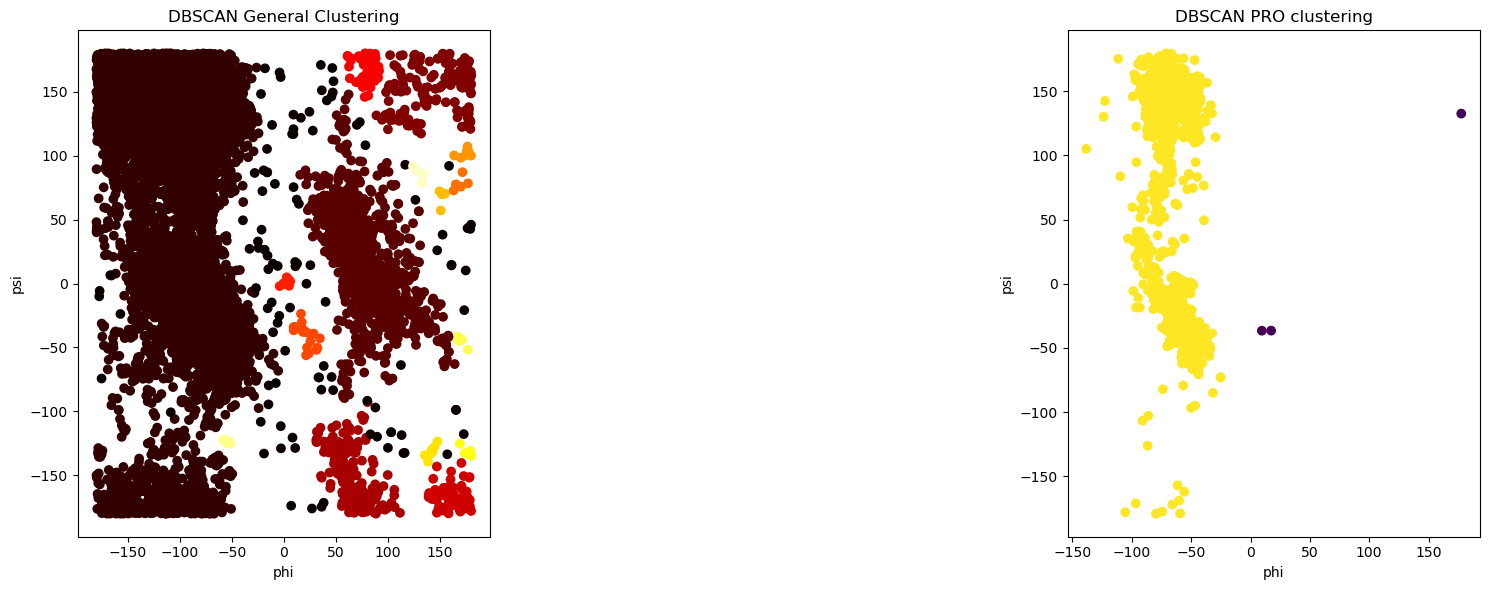

In [30]:


# Plots on the first subplot (index 0)
X =data_array
X_scaled = StandardScaler().fit_transform(X)



dbscan = DBSCAN(eps=0.15, min_samples=5).fit(X_scaled)

# Extract labels
labels = dbscan.labels_

# Plots results
plt.figure(figsize=(15, 6))

# Scatters plot
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='hot', marker='o')
plt.title('DBSCAN General Clustering')
plt.xlabel('phi')
plt.ylabel('psi')



data=pd.read_csv(r'C:\Users\Sul3y\Downloads\protein-angle-dataset.csv')
residue = data [data['residue name'] == 'PRO' ]
residue.drop('position',inplace=True,axis=1)
residue_numeric = residue.select_dtypes(include=[np.number])

# Convert the numeric DataFrame to a NumPy array if not already done
residue_array = residue_numeric.values
P =residue_array
P_scaled = StandardScaler().fit_transform(P)



dbscan = DBSCAN(eps=1, min_samples=3).fit(P_scaled)

# Extract labels
labels = dbscan.labels_



# Scatter plot
plt.subplot(1, 3, 3)
plt.scatter(P[:, 0], P[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('DBSCAN PRO clustering')
plt.xlabel('phi')
plt.ylabel('psi')


# Ensure that the plots are not overlapping
plt.tight_layout()

# Display the figure with subplots
plt.show()

